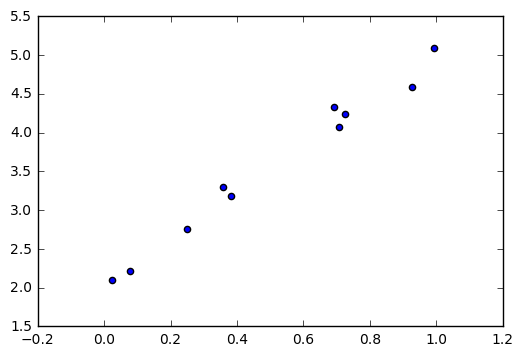

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# データを生成
n=10
x_data = np.random.rand(n).astype(np.float32)
y_data = x_data *  3 + 2

# 　ノイズを加える
y_data = y_data + 0.15 * np.random.randn(n) 

# ノイズ付きデータを描画
plt.scatter(x_data,y_data)
plt.show()

Step: 000,   Loss: 13.8112,   W: 0.000000,   b: 0.000000
Step: 010,   Loss: 0.0526,   W: 2.387010,   b: 2.386185
Step: 020,   Loss: 0.0217,   W: 2.727447,   b: 2.195586
Step: 030,   Loss: 0.0161,   W: 2.872291,   b: 2.114486
Step: 040,   Loss: 0.0151,   W: 2.933919,   b: 2.079980
Step: 050,   Loss: 0.0149,   W: 2.960139,   b: 2.065299
Step: 060,   Loss: 0.0149,   W: 2.971296,   b: 2.059052
Step: 070,   Loss: 0.0148,   W: 2.976043,   b: 2.056394
Step: 080,   Loss: 0.0148,   W: 2.978063,   b: 2.055263
Step: 090,   Loss: 0.0148,   W: 2.978922,   b: 2.054782
Step: 100,   Loss: 0.0148,   W: 2.979287,   b: 2.054578
Step: 110,   Loss: 0.0148,   W: 2.979443,   b: 2.054490
Step: 120,   Loss: 0.0148,   W: 2.979509,   b: 2.054453
Step: 130,   Loss: 0.0148,   W: 2.979537,   b: 2.054437
Step: 140,   Loss: 0.0148,   W: 2.979549,   b: 2.054431
Step: 150,   Loss: 0.0148,   W: 2.979554,   b: 2.054428
Step: 160,   Loss: 0.0148,   W: 2.979556,   b: 2.054427
Step: 170,   Loss: 0.0148,   W: 2.979556,   b: 

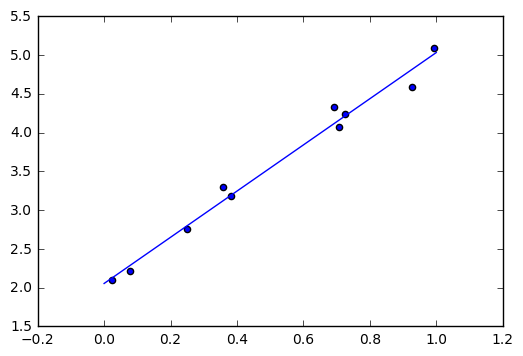

In [2]:
import tensorflow as tf

# 最適化の対象の変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

# モデル
y = W * x_data + b

# 誤差関数
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# トレーニング
for step in range(201):
    if step % 10 == 0:
        loss_val = sess.run(loss) 
        W_val = sess.run(W)
        b_val = sess.run(b)
        print('Step: %03d,   Loss: %5.4f,   W: %f,   b: %f' % (step,loss_val,W_val,b_val))   
    sess.run(train)


#  予測関数
def predict(x):
    return W_val * x + b_val

#  グラフ描画
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)

plt.scatter(x_data,y_data)
linex = np.linspace(0,1,2)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()